<a href="https://colab.research.google.com/github/kameda-yoshinari/DataAlgo2020/blob/master/DataAlgo2020_003(HelloCloud).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Google Colaboratoryの使い方

---
# Jupyter notebookの仕組み

[Jupyter](https://jupyter.org/)とは，主にpython(とRとJulia)をインタラクティブに実行できる環境．オープンソース．  
Jupyter notebookは，そのJupyter環境をウェブアプリで利用できるようにしたもの．こちらもオープンソース．インタラクティブなウェブページのような形をしている．Jupyter notebookはchoromeブラウザなどの上で利用できるようになっている．  
一般的な実行手順としては，まずどこかの計算機資源上でJupyter環境を用意し，ウェブサーバの機能を付けて実行する．次いで，手元のPCのブラウザでJupyter notebookを表示させる．Jupyter notebookがJupyter環境と通信することで，実際のプログラム実行などを実現している．利用しているブラウザが載っているPCと全く違うところにJupyter環境を用意することもできるし，同じPC上に両方用意することもできる．





---
# TextセルとCodeセル

Jupyer notebookでは主に２種類のセルを好きなように並べてウェブページを作成していく．  

* **テキストセル(text cell)**は文章等の表現のために使われる．  
* **コードセル(code cell)**は通常，プログラムソースを編集・表示するために使われる．  

どちらにもエディタ機能が埋め込まれていて，直接編集可能である．  
コードセルの特徴として，そのコードをその場で実行できることが挙げられる．より正確には，実行を依頼した瞬間にそのコードが裏のjupyer環境に転送され，そこで実行され，標準出力がブラウザ側に戻されて，それがJupyter notebookの当該コードセルに付属する形で出力される．

Jupyter notebookの記述に当たっては，先頭から順にコードセルを実行していくことが暗黙の裡に期待されてはいるが，コードセルが幾つもある場合，どのコードセルから実行するかはユーザ次第である．

なお，コードセルの実行を一切行わないのであれば（閲覧と編集のみであれば），バックエンドのJupyter環境はなくともよい．





---
# Google Colaboratoryの利用

Google ColaboratoryはGoogleが用意するJupyer環境とそれに繋がることを前提として改良がなされたJupyter notebook (Colab notebookと呼ばれる)とをまとめて指す．

Jupyter環境として，Google accountさえあれば，実行連続12時間内，無操作90分内という制限はあるものの，全くの無償のものをGoogle側が用意している．Googleが用意する実行環境はUbuntu linuxであるため，実際に通常のlinuxで実行できるようなプログラミング開発系の作業の多くはそのまま実行可能である．

また，Google Colaboratoryの特徴として，Google DriveのクラウドストレージをJupyter環境で普通のフォルダのように利用できるという機能がある．

Google colaboratoryはpython言語等の利用を主に想定しているが，C言語による利用も可能である．そこで，本授業ではC言語の学習にGoogle Colaboratoryを用いる．

それでは，Google Colaboratoryでランタイム接続（Jupyter環境と実際に接続）してみよう．jupyter notebookの右上の「接続」をクリックするだけである．  
(稀にGoogle側が混雑していると接続に失敗するときがあるので，そのときは十秒程度待って再度挑戦してみること）




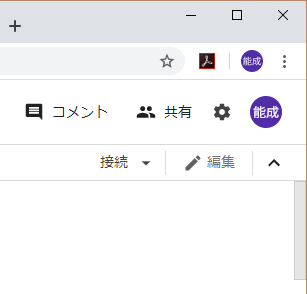

接続が成功したら Google colaboratory が本来想定しているpythonでコードを書いて実行してみよう．次のコードセルにpythonコードを書いてあるので実行してみよう．

In [0]:
# 本来はこのようにpythonのコードを書く
print("Hello, python on google colaboratory!")

---
# bashコマンド(コードセル内で!で始まる行)

コードセルは本来pythonを直接記述（編集）するように出来ている(ipython環境で実行される)．ipythonは拡張されていて，そこからbashコマンドも実行できる．その場合は，行の先頭を!とし，2文字目以降にbashコマンドを記述する．

実際には，コードセルの内容はpython(ipython)に渡されて実行されるが，そのipythonが!で始まる行を見つけると，その行ごとにbashを用意し，コマンドをそのbashに実行させる，という形になる．

下記の例では，bashが１行ごとに合計６回呼び出されている．





In [0]:
!echo "一例としてシステムの名前を表示"
!uname -a
!echo "世界中から使われるのでシステム時間はUTC表示"
!date
!echo "システム時間を日本時間表示"
!TZ='Asia/Tokyo'; export TZ; date

日本時間表示(JST-9, Japan, Asia/Tokyo)をランタイム接続で恒久化するなら下記を実行しておく．

In [0]:
!echo "日本時間表示をデフォルト化"
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Japan /etc/localtime
!date

上記の方法でコードセルでbashコマンドを実行することができるが，外部シェルを各行で用意するので，やや不便な時がある．

典型例がcdで，cdを実行したbashはその行の終了時に片づけられてしまうため，次の行のbashコマンド実行時には前のcdの結果は反映されない．

cd を２行用意してフォルダを移動していくというような作業をするには工夫が必要となる．下記の例１は失敗例である．例２は１行にbashコマンドを３つ連続して書く（";"で繋いでいる）ことで成功している．

In [0]:
!echo "例１：2行目，3行目，4行目は１つのシェルでの連続実行ではない"
!pwd
!cd /var/log
!pwd

In [0]:
!echo "例２：bashコマンドを１行にまとめれば連続実行になる"
!pwd ; cd /var/log ; pwd
!echo "でも改行したら元通り"
!pwd

---
# line magic(%) と cell magic (%%)
 
ipyhtonからのbash呼出時の不便を解消するべく，ipythonにはさらにmagicコマンドという拡張コマンドがある．

* %lsmagic

で一覧が表示される．

**Available line magics:**  
> %alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

** Available cell magics: **  
> %%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3  %%ruby  %%script  %%sh  %%shell  %%svg  %%sx  %%system  %%time  %%timeit  %%writefile

**line magic**は１行実行されるmagicコマンドであり，多くはbashのコマンドに見せかけて作られている．  
**cell magic**はコードセル１つを使うmagicコマンドであり，コードセル１つに１つしか配置できない．本授業ではこのうち，writefileというcell magicコマンドを用いてC言語のソースファイルを記述する．(残念ながらC言語仕様に最適化されたcell magicは無いが，writefileコマンドはほぼC言語仕様に対応している）




In [0]:
%lsmagic

magicコマンドを混ぜれば，擬似的に１つのbashで実行しているように見せかけることができる．


In [0]:
!echo "ここで3行目はmagicコマンド"
!pwd
%cd /usr/share
!pwd

---
# Google Driveのマウント

本授業では，Google Colaboratoryでランライム接続時に，Google Driveをマウントするものとする．

接続時にはgoogle accountの認証が必要になる．
これは新しいランタイム接続の度に１度（だけ）実行が必要である．
コードセルを実行し，"Go to this URL in a browser"のリンクをクリックする．
許可を出して，そのあと表示されるURLをコピーして，最初の "Enter your authorization code:"に入力する．



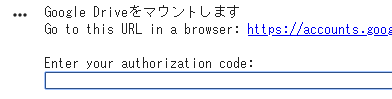


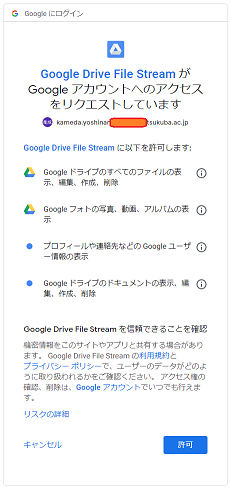

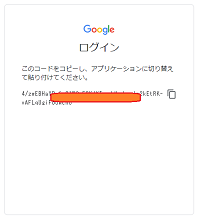


すると ランタイム環境において，Google drive のマイドライブが下記のパスでアクセスできるようになる．書き込むことも可能．
> /content/Drive/My Drive



In [0]:
!echo "Google Driveをマウントします"
from google.colab import drive 
drive.mount('/content/drive')

ただこのままでは使いにくいので，マウント先に移動し，作業フォルダを用意して，そこに行く．  

下記の例では，事前にGoogle Driveで202004_DataAlgoというフォルダを用意していたとする．


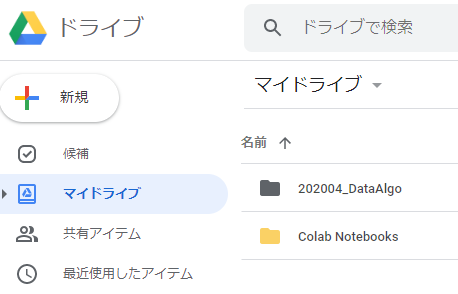

その下にDA020_003というフォルダをランタイム環境のほうで用意する．

In [0]:
%cd /content/drive/My\ Drive/
!mkdir -p 202004_DataAlgo
%cd 202004_DataAlgo
!mkdir -p DA2020_003
%cd DA2020_003
!ls

---
# C言語での開発

ではここで，伝統に則って，"Hello ESYS"と表示するC言語プログラムを作成し実行してみよう．

1. writefile というcell magicで helloESYS.c というソースファイルを作成（実行するとファイルに書き込まれる）
2. gccでコンパイル
3. bash上で実行

In [0]:
%%writefile helloESYS.c
// 初めてのCソースファイル on G-Colab at G-Drive
#include <stdio.h>
int main(int argc, char *argv[]){
    printf("Hello, ESYS!\n");
    return 0;
}

In [0]:
!gcc -Wall -o helloESYS helloESYS.c
!pwd
!ls -l
!echo "それでは実行します！"
!./helloESYS


---
# notebookの保存

"Colab notebook"本体は，各Google accountのGoogle drive / マイドライブ (My Drive) の下の Colab notebook というフォルダの下に自動保存される．
コードセルの実行の結果で生成されたファイルなどは"Colab notebook"と合わせて保存されたりはしない．

通常なら，コードセルの実行の結果で生成されたファイルなどはランタイム接続を終了した（仮想linuxをshutdownした）時点で全て消える．

ただし，Google drive上に生成したファイルなどは，仮想linuxが消えても，Google drive上に残る．





---
# notebookの提出

ipynb (IPYthon NoteBook) 形式でダウンロードすれば，Jupyer notebookとして保存可能である．ただし，そのファイルを開くにはJupyter notebook環境が必要である．

課題提出時には，実行したあとの出力を付けた状態でipynbでダウンロードし，それを提出することが望ましい．念のため，pdfでの出力もつけておくとよい（ただし，出力部が大量にあったりするとpdf形式では確認が無理なことがある）．




---
# ランタイム接続の終了

ブラウザ上で jupyter notebook の表示を止めてから 90 分で自動的に当該ランタイム接続は自動的に強制終了される．自らの手で終了させたい場合は，最初の「接続」のところからセッションの管理を選び，当該セッションについて「終了」を選択する．

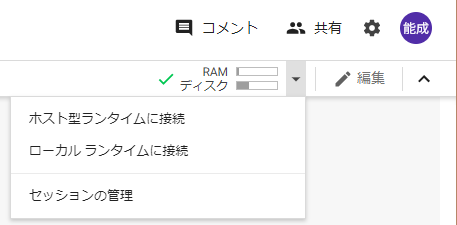

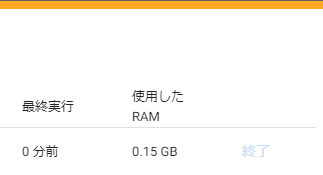

# 節末課題

1. helloESYS.cの改変と実行 　
helloESYS.cを適当に書き換えてコンパイルし，実行して見よ．

2. Google drive 連携  
Google drive側で生成したファイル等が ランタイム接続環境側でアクセスできることを確認せよ．  
（わずかに同期遅れが発生することがある）

3. Google drive 二重連携  
Windows PCなどを利用している場合，google driveを "Backup and sync from google" でPCのHDD/SSD等の領域に同期させ，Windows PCで当該フォルダにドロップしたファイルがランタイム接続環境でアクセスできることを確認せよ．  
（数秒程度同期遅れが発生することがある）


# 出典

筑波大学工学システム学類  
データ構造とアルゴリズム
担当：亀田能成  
2020/05/19.